## IMPORTING LIBRARIES

In [24]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

## IMPORTING DATASET

In [7]:
df=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\final_merged_file.csv")

## GAINING INSIGHTS FROM THE DATASET

In [9]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,71215,71216,71217,71218,71219,71220,71221,71222,71223,71224
time,810.07028,811.069380,812.068480,813.067580,814.066680,815.065780,816.06488,817.063980,818.063080,819.06218,...,2758.500000,2759.54000,2760.540000,2761.62000,2762.660000,2763.720000,2764.780000,2765.880000,2766.960000,2767.980000
input_voltage,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,...,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
el_power,1228.79172,1223.041745,1244.960866,1229.259058,1248.117024,1262.974403,1248.07756,1245.101476,1275.365542,1263.10121,...,1381.735307,1466.60594,1382.086291,1477.53456,1391.723501,1489.804659,1406.428985,1496.395814,1413.733107,1520.829291


## LOOKING FOR OUTLIERS

<Axes: >

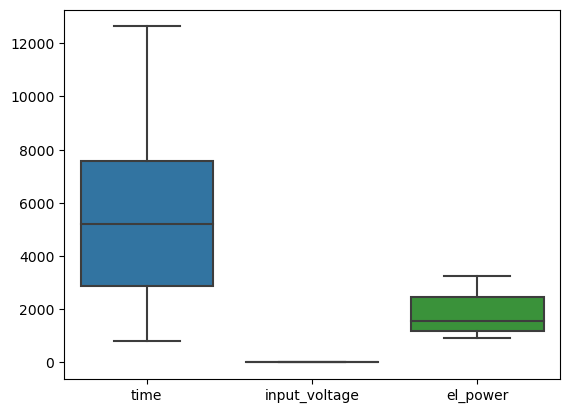

In [10]:
sns.boxplot(df)

In [11]:
df.shape

(71225, 3)

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
time,71225.0,5408.271003,2921.546664,810.00000,2863.240000,5209.800000,7572.280000,12636.840000
input_voltage,71225.0,5.547448,2.747764,3.00000,3.000000,4.785000,7.500000,10.000000
el_power,71225.0,1849.431363,773.601891,932.83726,1174.038382,1559.458917,2457.363665,3249.891217


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71225 entries, 0 to 71224
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           71225 non-null  float64
 1   input_voltage  71225 non-null  float64
 2   el_power       71225 non-null  float64
dtypes: float64(3)
memory usage: 1.6 MB


## APPLYING XGBOOST ALGORITHIM FOR COLUMN 'EL_POWER' AND PREDICTING VALUES

In [70]:
X = df.drop('el_power', axis=1)
y = df['el_power']

train_scores = []
validation_scores = []
train_predictions = []
validation_predictions = []

num_iterations = 100

for i in range(num_iterations):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.23, random_state=i)

    model = XGBRegressor()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val = r2_score(y_val, y_val_pred)

    train_scores.append((rmse_train, r2_train))
    validation_scores.append((rmse_val, r2_val))

    train_predictions.append(y_train_pred)
    validation_predictions.append(y_val_pred)

    print(f"\nIteration {i+1}:")
    print("Training Set:")
    print("RMSE:", rmse_train)
    print("R2 Score:", r2_train)

    print("\nValidation Set:")
    print("RMSE:", rmse_val)
    print("R2 Score:", r2_val)

df['el_power_XGB_final'] = model.predict(X)



Iteration 1:
Training Set:
RMSE: 177.31003438998732
R2 Score: 0.9474744717045277

Validation Set:
RMSE: 179.71574995564066
R2 Score: 0.945999686214421

Iteration 2:
Training Set:
RMSE: 177.3358804140886
R2 Score: 0.9473605445034933

Validation Set:
RMSE: 180.84289913556393
R2 Score: 0.9456613960905873

Iteration 3:
Training Set:
RMSE: 178.01602461777455
R2 Score: 0.9470202617956158

Validation Set:
RMSE: 178.3102100423299
R2 Score: 0.9469621273118349

Iteration 4:
Training Set:
RMSE: 177.53344382525492
R2 Score: 0.9472408096827294

Validation Set:
RMSE: 179.41037120542313
R2 Score: 0.9465270148830311

Iteration 5:
Training Set:
RMSE: 177.55306215933078
R2 Score: 0.9472603291972979

Validation Set:
RMSE: 178.87111698300745
R2 Score: 0.9467446205177147

Iteration 6:
Training Set:
RMSE: 175.98516929866625
R2 Score: 0.9481731466635059

Validation Set:
RMSE: 184.82029566214018
R2 Score: 0.9431980692771975

Iteration 7:
Training Set:
RMSE: 176.5239567252946
R2 Score: 0.9479488188433489

Val

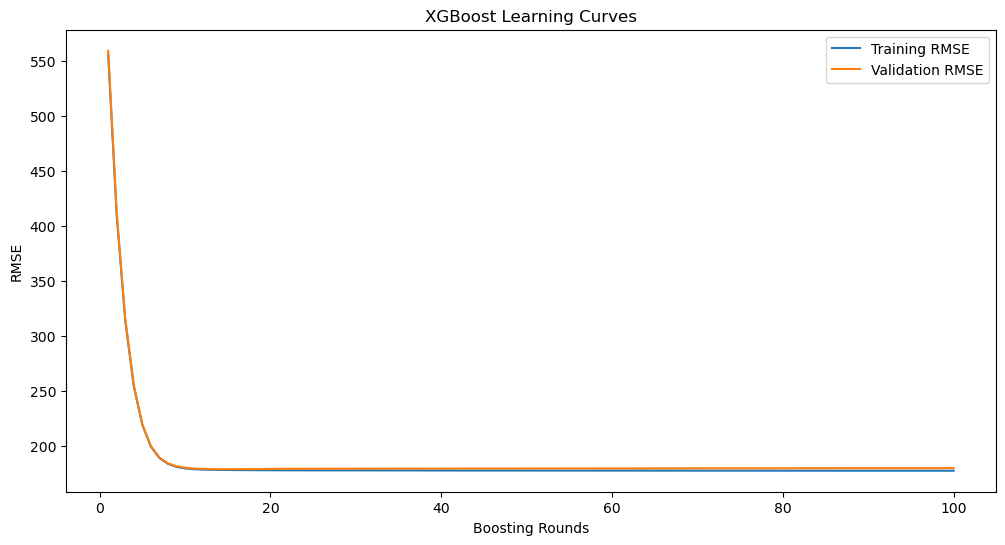

In [91]:
X = df.drop('el_power', axis=1)
y = df['el_power']

train_rmse = []
val_rmse = []
num_boost_rounds = 100

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.23, random_state=42)
model = XGBRegressor(n_estimators=num_boost_rounds)

for i in range(1, num_boost_rounds + 1):
    model.n_estimators = i
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    
    train_rmse.append(rmse_train)
    val_rmse.append(rmse_val)

plt.figure(figsize=(12, 6))
plt.plot(range(1, num_boost_rounds + 1), train_rmse, label='Training RMSE')
plt.plot(range(1, num_boost_rounds + 1), val_rmse, label='Validation RMSE')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('XGBoost Learning Curves')
plt.legend()
plt.show()

## NET SCORES

In [84]:
avg_rmse_train = np.mean([score[0] for score in train_scores])
avg_r2_train = np.mean([score[1] for score in train_scores])
avg_rmse_val = np.mean([score[0] for score in validation_scores])
avg_r2_val = np.mean([score[1] for score in validation_scores])
print("\nAverage Training Scores:")
print("RMSE:", avg_rmse_train)
print("R2 Score:", avg_r2_train)
print("\nAverage Validation Scores:")
print("RMSE:", avg_rmse_val)
print("R2 Score:", avg_r2_val)
net_rmse = avg_rmse_val
net_r2 = avg_r2_val
print("\nNet RMSE:", net_rmse)
print("Net R2 Score:", net_r2)


Average Training Scores:
RMSE: 177.09795678524048
R2 Score: 0.947591571894002

Average Validation Scores:
RMSE: 181.62517874929563
R2 Score: 0.9448564249727838

Net RMSE: 181.62517874929563
Net R2 Score: 0.9448564249727838


## MODEL VISUALIZATION

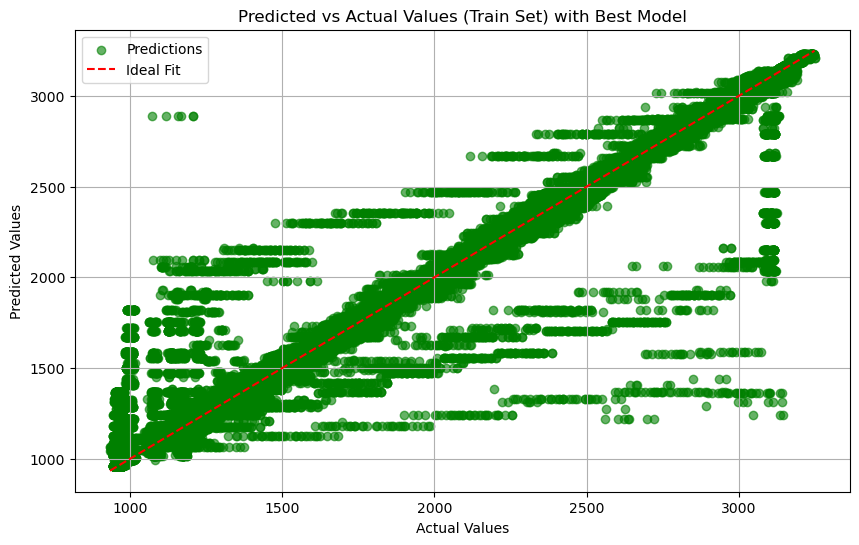

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='green', label='Predictions', alpha=0.6)
min_val = min(y_train.min(), y_train_pred.min())
max_val = max(y_train.max(), y_train_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Train Set) with Best Model')
plt.legend()
plt.grid(True)
plt.show()

### LOADING TEST DATASET

In [43]:
df1=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\combined_test_dataset.csv")

In [44]:
df1

,time,input_voltage,el_power
0,880.300000,3.0,1193.140713
1,881.300000,3.0,1107.066421
2,882.300000,3.0,1180.406767
3,883.300000,3.0,1095.551498
4,884.300000,3.0,1177.073719
...,...,...,...
18280,10541.535214,3.0,2373.250274
18281,10542.534511,3.0,2429.362888
18282,10543.533807,3.0,2369.397892
18283,10544.533103,3.0,2419.959332


In [67]:
df1.columns

Index(['time', 'input_voltage', 'el_power'], dtype='object')

In [74]:
df.columns

Index(['time', 'input_voltage', 'el_power', 'el_power_XGB',
       'el_power_XGB_final'],
      dtype='object')

In [75]:
df.drop(['el_power_XGB'],axis=1,inplace=True)

## TESTING THE MODEL

In [80]:
X_test = df1.drop('el_power', axis=1)  
y_test = df1['el_power']  
y_test_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Set:")
print("RMSE:", rmse_test)
print("R2 Score:", r2_test)


Test Set:
RMSE: 120.6822673112125
R2 Score: 0.9777290237288631


## VISUALIZATION OF THE TEST GRAPH

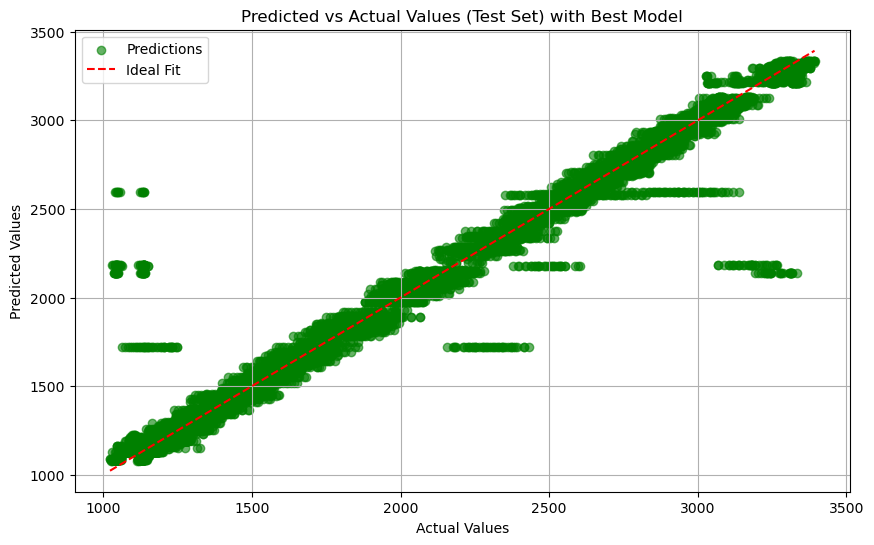

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Predictions', alpha=0.6)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Test Set) with Best Model')
plt.legend()
plt.grid(True)
plt.show()

## CONCLUSION

In [ ]:
Average Training Scores:
RMSE: 177.09795678524048
R2 Score: 0.947591571894002

Average Validation Scores:
RMSE: 181.62517874929563
R2 Score: 0.9448564249727838

Net RMSE: 181.62517874929563
Net R2 Score: 0.9448564249727838

Test Set:
RMSE: 118.62135676593967
R2 Score: 0.9784831789648761

Based on the learning rate of the model from training dataset its clear that its not intersecting hence the above model is a good fit.